In [1]:
import nibabel
import numpy as np
import mne

In [2]:
original_data = mne.io.read_raw_kit('./sub-01/ses-0/meg/sub-01_ses-0_task-0_meg.con')
original_info = original_data.info

Extracting SQD Parameters from ./sub-01/ses-0/meg/sub-01_ses-0_task-0_meg.con...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Ready.


In [3]:
original_info

<Info | 9 non-empty values
 bads: []
 ch_names: MEG 001, MEG 002, MEG 003, MEG 004, MEG 005, MEG 006, MEG 007, ...
 chs: 208 Magnetometers, 16 Reference Magnetometers, 32 misc, 1 Stimulus
 custom_ref_applied: False
 description: New York University Abu Dhabi/224-channel MEG System (442) ...
 highpass: 0.0 Hz
 kit_system_id: 442 (New York University Abu Dhabi, 2014-)
 lowpass: 200.0 Hz
 meas_date: 2017-03-16 11:45:34 UTC
 nchan: 257
 projs: []
 sfreq: 1000.0 Hz
>

In [4]:
original_data.get_data().shape

(257, 396000)

In [5]:
import pandas
import mne_bids

In [6]:
bids_path = mne_bids.BIDSPath(
subject = '01', session = '0', task='0', datatype= "meg",
root = '.')

In [7]:
raw = mne_bids.read_raw_bids(bids_path)

Extracting SQD Parameters from sub-01/ses-0/meg/sub-01_ses-0_task-0_meg.con...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Ready.
Reading events from sub-01/ses-0/meg/sub-01_ses-0_task-0_events.tsv.
Reading channel info from sub-01/ses-0/meg/sub-01_ses-0_task-0_channels.tsv.
The stimulus channel "STI 014" is present in the raw data, but not included in channels.tsv. Removing the channel.


In [8]:
raw.load_data().filter(0.5, 30.0, n_jobs=1)

Reading 0 ... 395999  =      0.000 ...   395.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (6.601 sec)



<RawKIT | sub-01_ses-0_task-0_meg.con, 256 x 396000 (396.0 s), ~773.7 MB, data loaded>

In [9]:
raw.get_data().data.shape

(256, 396000)

In [10]:
raw

<RawKIT | sub-01_ses-0_task-0_meg.con, 256 x 396000 (396.0 s), ~773.7 MB, data loaded>

In [11]:
raw.ch_names

['MEG 001',
 'MEG 002',
 'MEG 003',
 'MEG 004',
 'MEG 005',
 'MEG 006',
 'MEG 007',
 'MEG 008',
 'MEG 009',
 'MEG 010',
 'MEG 011',
 'MEG 012',
 'MEG 013',
 'MEG 014',
 'MEG 015',
 'MEG 016',
 'MEG 017',
 'MEG 018',
 'MEG 019',
 'MEG 020',
 'MEG 021',
 'MEG 022',
 'MEG 023',
 'MEG 024',
 'MEG 025',
 'MEG 026',
 'MEG 027',
 'MEG 028',
 'MEG 029',
 'MEG 030',
 'MEG 031',
 'MEG 032',
 'MEG 033',
 'MEG 034',
 'MEG 035',
 'MEG 036',
 'MEG 037',
 'MEG 038',
 'MEG 039',
 'MEG 040',
 'MEG 041',
 'MEG 042',
 'MEG 043',
 'MEG 044',
 'MEG 045',
 'MEG 046',
 'MEG 047',
 'MEG 048',
 'MEG 049',
 'MEG 050',
 'MEG 051',
 'MEG 052',
 'MEG 053',
 'MEG 054',
 'MEG 055',
 'MEG 056',
 'MEG 057',
 'MEG 058',
 'MEG 059',
 'MEG 060',
 'MEG 061',
 'MEG 062',
 'MEG 063',
 'MEG 064',
 'MEG 065',
 'MEG 066',
 'MEG 067',
 'MEG 068',
 'MEG 069',
 'MEG 070',
 'MEG 071',
 'MEG 072',
 'MEG 073',
 'MEG 074',
 'MEG 075',
 'MEG 076',
 'MEG 077',
 'MEG 078',
 'MEG 079',
 'MEG 080',
 'MEG 081',
 'MEG 082',
 'MEG 083',
 'ME

In [12]:
df = raw.annotations.to_data_frame()

In [13]:
df.shape

(3134, 3)

In [14]:
df.head()

,onset,duration,description
0,2017-03-16 11:45:57.506,0.00,"{'index': 5.0, 'subject': 'A0167', 'story': 'l..."
1,2017-03-16 11:45:57.506,0.08,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
2,2017-03-16 11:45:57.506,0.30,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
3,2017-03-16 11:45:57.586,0.09,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
4,2017-03-16 11:45:57.676,0.07,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."


In [15]:
import pandas as pd
df_new = pd.DataFrame(df.description.apply(eval).to_list())

In [16]:
df_new.shape

(3134, 17)

In [17]:
df_new.head()

,index,subject,story,story_uid,sound_id,kind,meg_file,start,sound,phoneme,sequence_id,condition,word_index,speech_rate,voice,pronounced,word
0,5.0,A0167,lw1,0.0,0.0,sound,A0167_MASC_1_16Mar17_01.con,0.00,stimuli/audio/lw1_0.0.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.00,stimuli/audio/lw1_0.wav,t_B,0.0,sentence,0.0,205.0,Allison,1.0,NaN
2,NaN,NaN,lw1,0.0,0.0,word,A0167_MASC_1_16Mar17_01.con,0.00,stimuli/audio/lw1_0.wav,NaN,0.0,sentence,0.0,205.0,Allison,1.0,Tara
3,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.08,stimuli/audio/lw1_0.wav,eh_I,0.0,sentence,0.0,205.0,Allison,1.0,NaN
4,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.17,stimuli/audio/lw1_0.wav,r_I,0.0,sentence,0.0,205.0,Allison,1.0,NaN


In [18]:
df.iloc[0:20]

,onset,duration,description
0,2017-03-16 11:45:57.506,0.00,"{'index': 5.0, 'subject': 'A0167', 'story': 'l..."
1,2017-03-16 11:45:57.506,0.08,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
2,2017-03-16 11:45:57.506,0.30,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
3,2017-03-16 11:45:57.586,0.09,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
4,2017-03-16 11:45:57.676,0.07,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
5,2017-03-16 11:45:57.746,0.06,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
6,2017-03-16 11:45:57.816,0.06,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
7,2017-03-16 11:45:57.816,0.24,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
8,2017-03-16 11:45:57.876,0.04,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
9,2017-03-16 11:45:57.916,0.08,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."


In [19]:
df_new.iloc[0:50]

,index,subject,story,story_uid,sound_id,kind,meg_file,start,sound,phoneme,sequence_id,condition,word_index,speech_rate,voice,pronounced,word
0,5.0,A0167,lw1,0.0,0.0,sound,A0167_MASC_1_16Mar17_01.con,0.00,stimuli/audio/lw1_0.0.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.00,stimuli/audio/lw1_0.wav,t_B,0.0,sentence,0.0,205.0,Allison,1.0,NaN
2,NaN,NaN,lw1,0.0,0.0,word,A0167_MASC_1_16Mar17_01.con,0.00,stimuli/audio/lw1_0.wav,NaN,0.0,sentence,0.0,205.0,Allison,1.0,Tara
3,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.08,stimuli/audio/lw1_0.wav,eh_I,0.0,sentence,0.0,205.0,Allison,1.0,NaN
4,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.17,stimuli/audio/lw1_0.wav,r_I,0.0,sentence,0.0,205.0,Allison,1.0,NaN
5,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.24,stimuli/audio/lw1_0.wav,ah_E,0.0,sentence,0.0,205.0,Allison,1.0,NaN
6,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.31,stimuli/audio/lw1_0.wav,s_B,0.0,sentence,1.0,205.0,Allison,1.0,NaN
7,NaN,NaN,lw1,0.0,0.0,word,A0167_MASC_1_16Mar17_01.con,0.31,stimuli/audio/lw1_0.wav,NaN,0.0,sentence,1.0,205.0,Allison,1.0,stood
8,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.37,stimuli/audio/lw1_0.wav,t_I,0.0,sentence,1.0,205.0,Allison,1.0,NaN
9,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.41,stimuli/audio/lw1_0.wav,uh_I,0.0,sentence,1.0,205.0,Allison,1.0,NaN


In [20]:
df_new[df_new['kind']=='sound'].head()

,index,subject,story,story_uid,sound_id,kind,meg_file,start,sound,phoneme,sequence_id,condition,word_index,speech_rate,voice,pronounced,word
0,5.0,A0167,lw1,0.0,0.0,sound,A0167_MASC_1_16Mar17_01.con,0.0,stimuli/audio/lw1_0.0.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873,7.0,A0167,lw1,0.0,1.0,sound,A0167_MASC_1_16Mar17_01.con,0.0,stimuli/audio/lw1_1.0.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1527,9.0,A0167,lw1,0.0,2.0,sound,A0167_MASC_1_16Mar17_01.con,0.0,stimuli/audio/lw1_2.0.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2551,11.0,A0167,lw1,0.0,3.0,sound,A0167_MASC_1_16Mar17_01.con,0.0,stimuli/audio/lw1_3.0.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_new['kind'].value_counts()

phoneme    2462
word        668
sound         4
Name: kind, dtype: int64

In [22]:
df_new[df_new['kind']=='phoneme'].groupby('phoneme').head()

,index,subject,story,story_uid,sound_id,kind,meg_file,start,sound,phoneme,sequence_id,condition,word_index,speech_rate,voice,pronounced,word
1,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.00,stimuli/audio/lw1_0.wav,t_B,0.0,sentence,0.0,205.0,Allison,1.0,NaN
3,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.08,stimuli/audio/lw1_0.wav,eh_I,0.0,sentence,0.0,205.0,Allison,1.0,NaN
4,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.17,stimuli/audio/lw1_0.wav,r_I,0.0,sentence,0.0,205.0,Allison,1.0,NaN
5,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.24,stimuli/audio/lw1_0.wav,ah_E,0.0,sentence,0.0,205.0,Allison,1.0,NaN
6,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.31,stimuli/audio/lw1_0.wav,s_B,0.0,sentence,1.0,205.0,Allison,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,NaN,NaN,lw1,0.0,3.0,phoneme,A0167_MASC_1_16Mar17_01.con,33.98,stimuli/audio/lw1_3.wav,ch_B,49.0,sentence,24.0,205.0,Allison,1.0,NaN
2936,NaN,NaN,lw1,0.0,3.0,phoneme,A0167_MASC_1_16Mar17_01.con,35.29,stimuli/audio/lw1_3.wav,p_E,49.0,sentence,27.0,205.0,Allison,1.0,NaN
2986,NaN,NaN,lw1,0.0,3.0,phoneme,A0167_MASC_1_16Mar17_01.con,39.98,stimuli/audio/lw1_3.wav,th_I,50.0,sentence,13.0,205.0,Allison,1.0,NaN
3047,NaN,NaN,lw1,0.0,3.0,phoneme,A0167_MASC_1_16Mar17_01.con,46.34,stimuli/audio/lw1_3.wav,g_E,51.0,word_list,11.0,205.0,Allison,1.0,NaN


In [39]:
df_new.iloc[874]

index                                  NaN
subject                                NaN
story                                  lw1
story_uid                                0
sound_id                                 1
kind                               phoneme
meg_file       A0167_MASC_1_16Mar17_01.con
start                                 0.44
sound              stimuli/audio/lw1_1.wav
phoneme                                w_B
sequence_id                             14
condition                         sentence
word_index                               2
speech_rate                            145
voice                              Allison
pronounced                               1
word                                   NaN
Name: 874, dtype: object

In [22]:
df_new['kind'].value_counts()

phoneme    2462
word        668
sound         4
Name: kind, dtype: int64

In [20]:
df.iloc[850:900]

,onset,duration,description
850,2017-03-16 11:47:30.866,0.06,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
851,2017-03-16 11:47:30.926,0.05,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
852,2017-03-16 11:47:30.976,0.07,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
853,2017-03-16 11:47:31.046,0.07,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
854,2017-03-16 11:47:31.126,0.08,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
855,2017-03-16 11:47:31.126,0.15,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
856,2017-03-16 11:47:31.206,0.07,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
857,2017-03-16 11:47:31.276,0.07,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
858,2017-03-16 11:47:31.276,0.52,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."
859,2017-03-16 11:47:31.346,0.08,"{'story': 'lw1', 'story_uid': 0.0, 'sound_id':..."


In [23]:
ph_info = pd.read_csv("phoneme_info.csv")
subjects = pd.read_csv("participants.tsv", sep="\t")
subjects = subjects.participant_id.apply(lambda x: x.split("-")[1]).values

In [24]:
# preproc annotations
from wordfreq import zipf_frequency
meta = list()
for annot in raw.annotations:
    d = eval(annot.pop("description"))
    for k, v in annot.items():
        assert k not in d.keys()
        d[k] = v
    meta.append(d)
meta = pd.DataFrame(meta)
meta["intercept"] = 1.0

# compute voicing
phonemes = meta.query('kind=="phoneme"')
assert len(phonemes)
for ph, d in phonemes.groupby("phoneme"):
    ph = ph.split("_")[0]
    match = ph_info.query("phoneme==@ph")
    assert len(match) == 1
    meta.loc[d.index, "voiced"] = match.iloc[0].phonation == "v"

# compute word frquency and merge w/ phoneme
meta["is_word"] = False
words = meta.query('kind=="word"').copy()
assert len(words) > 10
# assert np.all(meta.loc[words.index + 1, "kind"] == "phoneme")
meta.loc[words.index + 1, "is_word"] = True
wfreq = lambda x: zipf_frequency(x, "en")  # noqa
meta.loc[words.index + 1, "wordfreq"] = words.word.apply(wfreq).values

meta = meta.query('kind=="phoneme"')
assert len(meta.wordfreq.unique()) > 2

# segment
events = np.c_[
    meta.onset * raw.info["sfreq"], np.ones((len(meta), 2))
].astype(int)

epochs = mne.Epochs(
    raw,
    events,
    tmin=-0.2,
    tmax=3,
    decim=10,
    baseline=(-0.2, 0.0),
    metadata=meta,
    preload=True,
    event_repeated="drop",
)

# threshold
th = np.percentile(np.abs(epochs._data), 95)
epochs._data[:] = np.clip(epochs._data, -th, th)
epochs.apply_baseline()
th = np.percentile(np.abs(epochs._data), 95)
epochs._data[:] = np.clip(epochs._data, -th, th)
epochs.apply_baseline()

Adding metadata with 24 columns
2462 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2462 events and 3201 original time points (prior to decimation) ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Number of events,2462
Events,1: 2462
Time range,-0.200 – 3.000 sec
Baseline,-0.200 – 0.000 sec


In [25]:
epochs.metadata["half"] = np.round(
                np.linspace(0, 1.0, len(epochs))
            ).astype(int)
epochs.metadata["task"] = '0'
epochs.metadata["session"] = '0'

In [26]:
words = epochs["is_word"]
X = words.get_data() * 1e13

In [27]:
X.shape

(668, 256, 321)

In [60]:
epochs.annotations.description

array(["{'index': 5.0, 'subject': 'A0167', 'story': 'lw1', 'story_uid': 0.0, 'sound_id': 0.0, 'kind': 'sound', 'meg_file': 'A0167_MASC_1_16Mar17_01.con', 'start': 0.0, 'sound': 'stimuli/audio/lw1_0.0.wav'}",
       "{'story': 'lw1', 'story_uid': 0.0, 'sound_id': 0.0, 'kind': 'phoneme', 'meg_file': 'A0167_MASC_1_16Mar17_01.con', 'start': 0.0, 'sound': 'stimuli/audio/lw1_0.wav', 'phoneme': 't_B', 'sequence_id': 0.0, 'condition': 'sentence', 'word_index': 0.0, 'speech_rate': 205.0, 'voice': 'Allison', 'pronounced': 1.0}",
       "{'story': 'lw1', 'story_uid': 0.0, 'sound_id': 0.0, 'kind': 'word', 'meg_file': 'A0167_MASC_1_16Mar17_01.con', 'start': 0.0, 'sound': 'stimuli/audio/lw1_0.wav', 'word': 'Tara', 'sequence_id': 0.0, 'condition': 'sentence', 'word_index': 0.0, 'speech_rate': 205.0, 'voice': 'Allison', 'pronounced': 1.0}",
       ...,
       "{'story': 'lw1', 'story_uid': 0.0, 'sound_id': 3.0, 'kind': 'phoneme', 'meg_file': 'A0167_MASC_1_16Mar17_01.con', 'start': 52.03, 'sound': 'sti

In [69]:
meta.head()

,index,subject,story,story_uid,sound_id,kind,meg_file,start,sound,onset,...,condition,word_index,speech_rate,voice,pronounced,word,intercept,voiced,is_word,wordfreq
1,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.00,stimuli/audio/lw1_0.wav,23.506,...,sentence,0.0,205.0,Allison,1.0,NaN,1.0,False,False,NaN
3,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.08,stimuli/audio/lw1_0.wav,23.586,...,sentence,0.0,205.0,Allison,1.0,NaN,1.0,True,True,3.66
4,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.17,stimuli/audio/lw1_0.wav,23.676,...,sentence,0.0,205.0,Allison,1.0,NaN,1.0,True,False,NaN
5,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.24,stimuli/audio/lw1_0.wav,23.746,...,sentence,0.0,205.0,Allison,1.0,NaN,1.0,True,False,NaN
6,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.31,stimuli/audio/lw1_0.wav,23.816,...,sentence,1.0,205.0,Allison,1.0,NaN,1.0,False,False,NaN


In [26]:
y = words.metadata["wordfreq"].values

In [27]:
y.shape

(668,)

In [35]:
def plot(result):
    fig, ax = plt.subplots(1, figsize=[6, 6])
    sns.lineplot(x="time", y="score", data=result, hue="label", ax=ax)
    ax.axhline(0, color="k")
    return fig

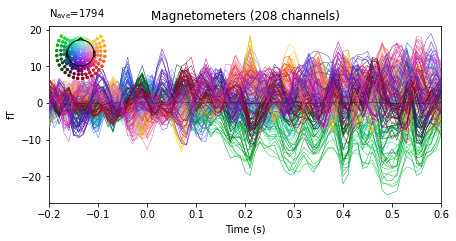

In [36]:
# Phonemes
phonemes = epochs["not is_word"]
evo = phonemes.average()
fig_evo_ph = evo.plot(spatial_colors=True, show=False)

In [106]:
phonemes.metadata.iloc[0:50]

,index,subject,story,story_uid,sound_id,kind,meg_file,start,sound,onset,...,voice,pronounced,word,intercept,voiced,is_word,wordfreq,half,task,session
0,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.00,stimuli/audio/lw1_0.wav,23.506,...,Allison,1.0,NaN,1.0,False,False,NaN,0,0,0
2,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.17,stimuli/audio/lw1_0.wav,23.676,...,Allison,1.0,NaN,1.0,True,False,NaN,0,0,0
3,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.24,stimuli/audio/lw1_0.wav,23.746,...,Allison,1.0,NaN,1.0,True,False,NaN,0,0,0
4,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.31,stimuli/audio/lw1_0.wav,23.816,...,Allison,1.0,NaN,1.0,False,False,NaN,0,0,0
6,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.41,stimuli/audio/lw1_0.wav,23.916,...,Allison,1.0,NaN,1.0,True,False,NaN,0,0,0
7,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.49,stimuli/audio/lw1_0.wav,23.996,...,Allison,1.0,NaN,1.0,True,False,NaN,0,0,0
8,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.55,stimuli/audio/lw1_0.wav,24.056,...,Allison,1.0,NaN,1.0,False,False,NaN,0,0,0
10,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.67,stimuli/audio/lw1_0.wav,24.176,...,Allison,1.0,NaN,1.0,True,False,NaN,0,0,0
11,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,0.79,stimuli/audio/lw1_0.wav,24.296,...,Allison,1.0,NaN,1.0,False,False,NaN,0,0,0
12,NaN,NaN,lw1,0.0,0.0,phoneme,A0167_MASC_1_16Mar17_01.con,1.08,stimuli/audio/lw1_0.wav,24.586,...,Allison,1.0,NaN,1.0,False,False,NaN,0,0,0


In [110]:
epochs.events

array([[ 23506,      1,      1],
       [ 23586,      1,      1],
       [ 23676,      1,      1],
       ...,
       [363057,      1,      1],
       [363137,      1,      1],
       [363147,      1,      1]])

In [30]:
XX = words.average()

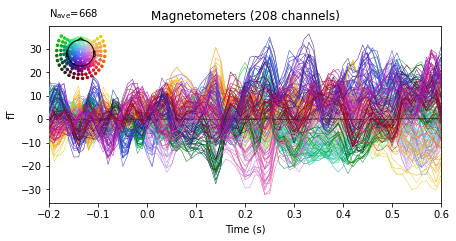

In [31]:
fig_evo_word = XX.plot(spatial_colors=True, show=False)

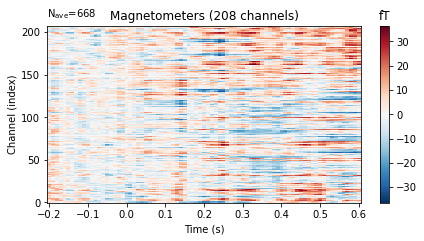

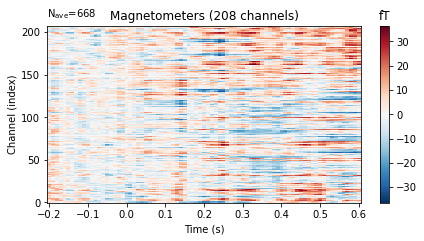

In [32]:
XX.plot_image()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


/home/subbainria/anaconda3/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


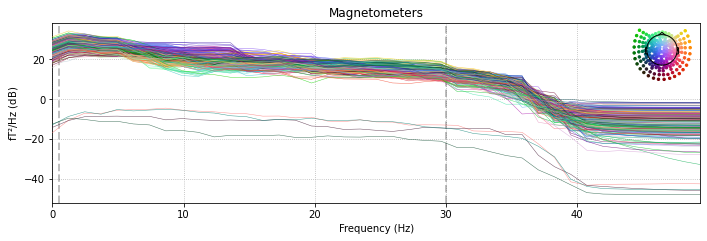

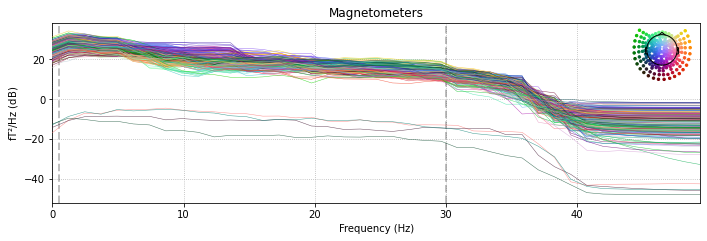

In [33]:
XX.plot_psd()

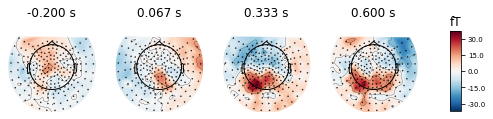

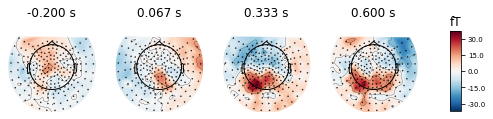

In [34]:
XX.plot_topomap()

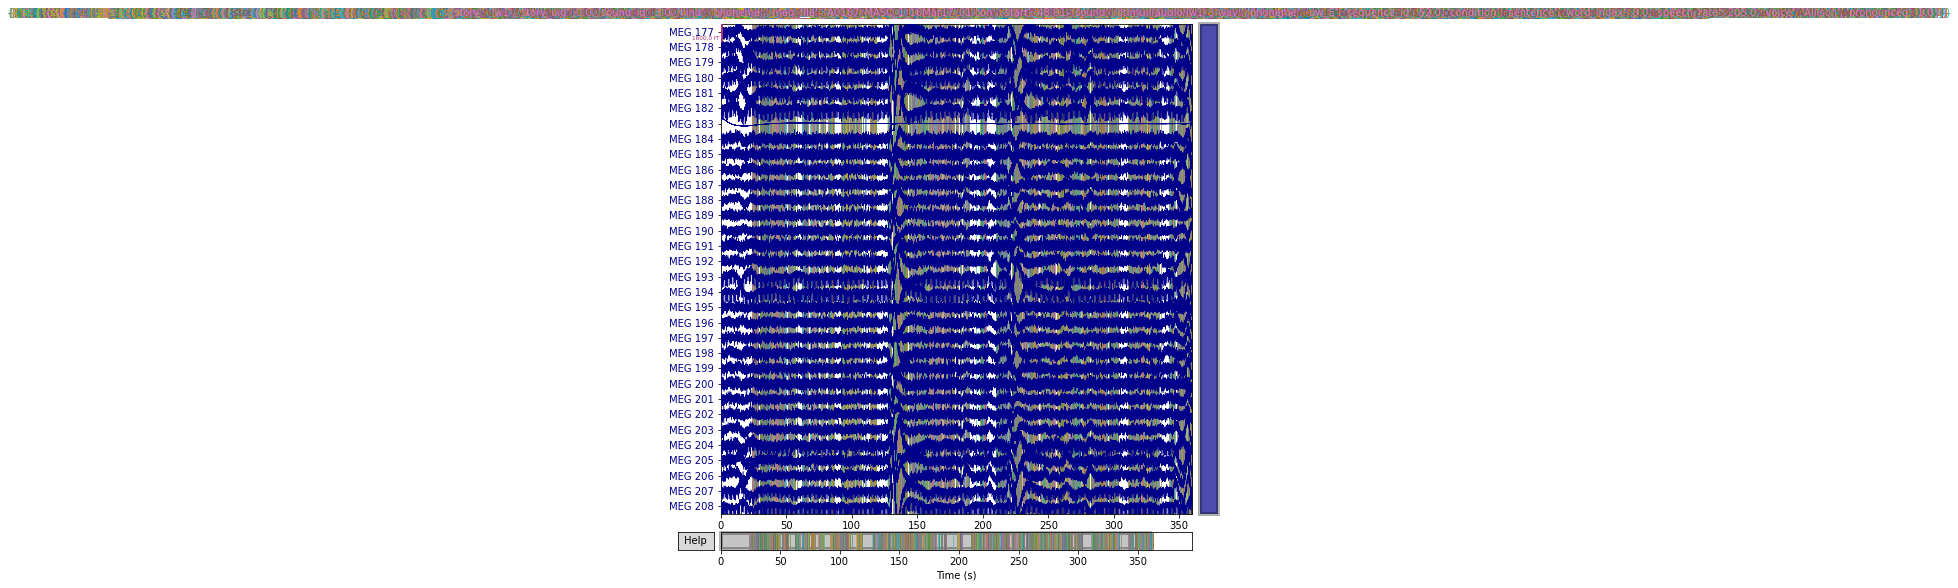

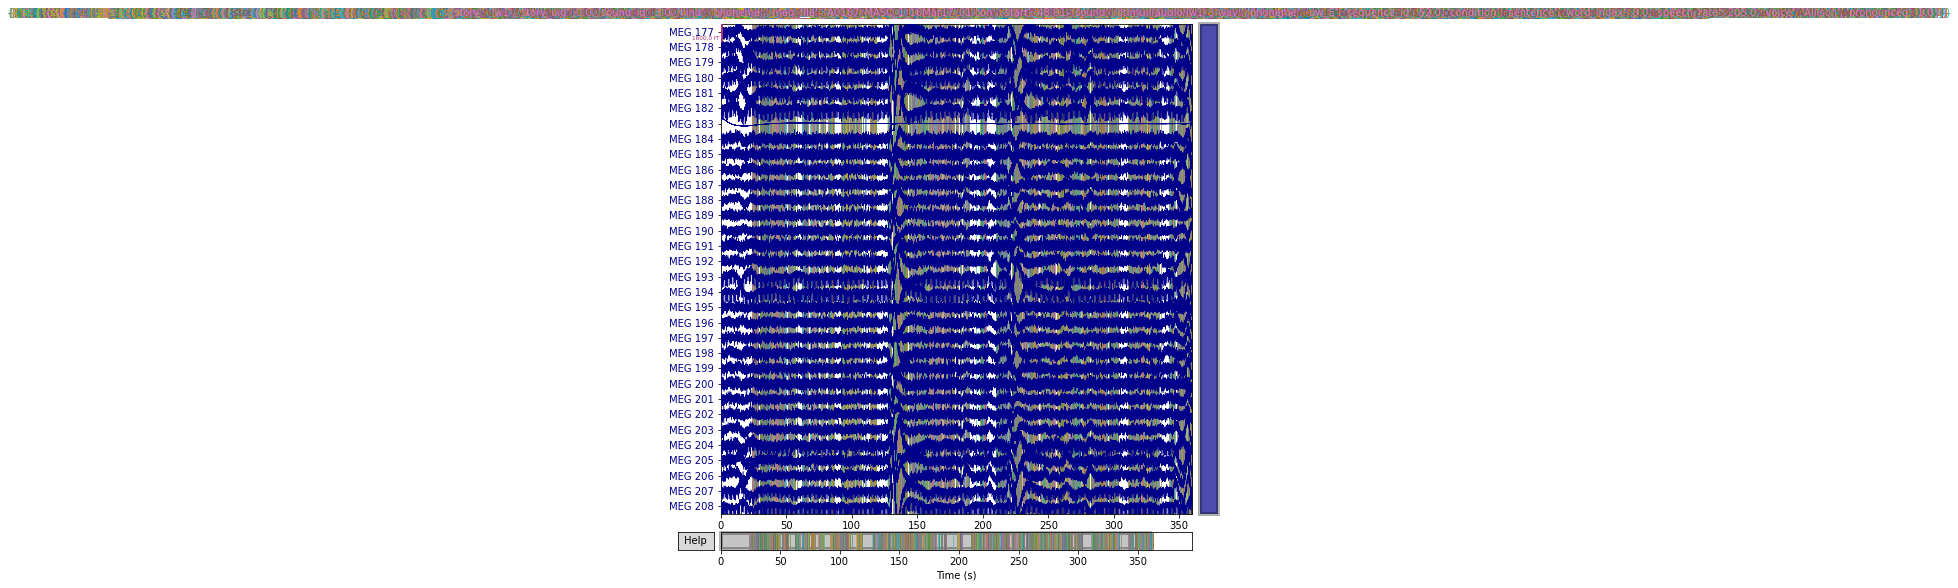

In [137]:
select_picks = np.concatenate(
    (mne.pick_types(raw.info, meg=True)[-32:],
     #mne.pick_types(raw.info, meg=False, ref_meg=True)
    ))
plot_kwargs = dict(
    duration=360, order=select_picks, n_channels=len(select_picks),
    scalings={"mag": 8e-13, "ref_meg": 2e-11})
raw.plot(**plot_kwargs)


In [138]:
sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)


(array([[4.55170456e-13, 4.04281834e-13, 4.39149964e-13, ...,
        7.44481699e-14, 6.03124414e-14, 1.68686360e-13]]), array([11.   , 11.001, 11.002, ..., 12.997, 12.998, 12.999]))


In [139]:
sampling_freq

1000.0

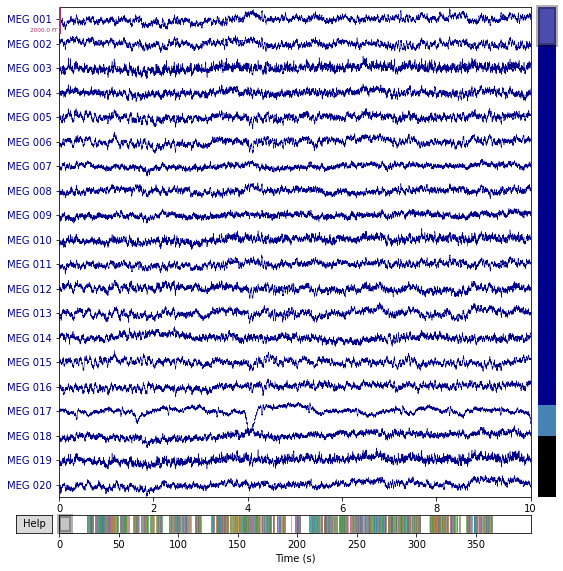

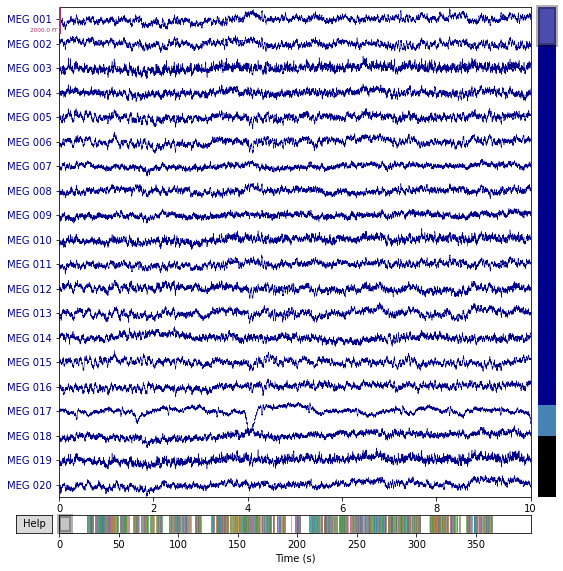

In [140]:
raw.plot()

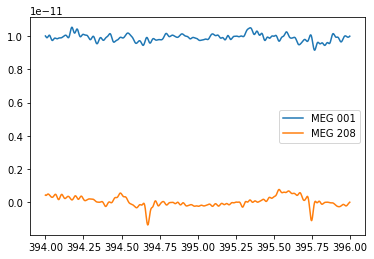

In [53]:
import matplotlib.pyplot as plt
sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([394, 400])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_names = ['MEG 001', 'MEG 208']
two_meg_chans = raw[channel_names, start_sample:stop_sample]
y_offset = np.array([1e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from os.path import join

import mne
from mne.decoding import ReceptiveField
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale

Using default location ~/mne_data for mtrf...
Creating ~/mne_data


100%|█████████████████████████████████████| 58.1M/58.1M [00:00<00:00, 21.2GB/s]
Unzipping contents of '/home/subbainria/mne_data/mTRF_1.5.zip' to '/home/subbainria/mne_data'


Attempting to create new mne-python configuration file:
/home/subbainria/.mne/mne-python.json
Creating RawArray with float64 data, n_channels=128, n_times=7677
    Range : 0 ... 7676 =      0.000 ...   119.938 secs
Ready.


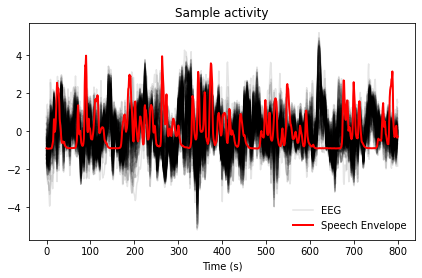

In [55]:
path = mne.datasets.mtrf.data_path()
decim = 2
data = loadmat(join(path, 'speech_data.mat'))
raw = data['EEG'].T
speech = data['envelope'].T
sfreq = float(data['Fs'])
sfreq /= decim
speech = mne.filter.resample(speech, down=decim, npad='auto')
raw = mne.filter.resample(raw, down=decim, npad='auto')

# Read in channel positions and create our MNE objects from the raw data
montage = mne.channels.make_standard_montage('biosemi128')
info = mne.create_info(montage.ch_names, sfreq, 'eeg').set_montage(montage)
raw = mne.io.RawArray(raw, info)
n_channels = len(raw.ch_names)

# Plot a sample of brain and stimulus activity
fig, ax = plt.subplots()
lns = ax.plot(scale(raw[:, :800][0].T), color='k', alpha=.1)
ln1 = ax.plot(scale(speech[0, :800]), color='r', lw=2)
ax.legend([lns[0], ln1[0]], ['EEG', 'Speech Envelope'], frameon=False)
ax.set(title="Sample activity", xlabel="Time (s)")
mne.viz.tight_layout()

In [57]:
data['envelope'].T.shape

(1, 15354)

In [58]:
data['EEG'].T.shape

(128, 15354)

In [59]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'spectrogram', 'envelope', 'EEG'])

In [61]:
data['spectrogram'].shape

(15354, 16)

In [63]:
speech.shape

(1, 7677)

In [65]:
info

<Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 128 EEG
 custom_ref_applied: False
 dig: 131 items (3 Cardinal, 128 EEG)
 highpass: 0.0 Hz
 lowpass: 32.0 Hz
 meas_date: unspecified
 nchan: 128
 projs: []
 sfreq: 64.0 Hz
>